<a href="https://colab.research.google.com/github/larigioad/projetos-soulcode/blob/main/Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymongo
from pymongo import MongoClient

In [ ]:
uri = "mongodb+srv://larigioad.xj2ckxw.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-1801012685387590698.pem',
                     )


db = client['tratados']
collection = db['airbnb_tratado']

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage

In [ ]:
serviceAccount = '/content/bionic-region-377820-6b574ad3c183.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/igorgondimfreebuck/amsterdam_weekdays.csv', sep=',', encoding='ISO-8859-1') 

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.dtypes

In [ ]:
df.rename(columns={'realSum': 'preco_total', 'room_type': 'tipo_de_quarto', 'room_shared': 'quarto_compartilhado', 'room_private ': 'quarto_privativo', 'person_capacity': 'maximo_pessoas', 'host_is_superhost': 'anfitriao_e_superhost', 'multi': 'muitos_quartos', 'biz': 'uso', 'cleanliness_rating': 'nota_limpeza', 'guest_satisfaction_overall': 'satisfacao_geral_hospede', 'bedrooms': 'quartos', 'dist': 'dist_centro', 'metro_dist': 'dist_metro', 'lng': 'longitude', 'lat': 'latitude'}, inplace=True)

In [ ]:
df.drop(['Unnamed: 0', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'],axis=1,inplace=True)

In [ ]:
df.loc[df.tipo_de_quarto == 'Private room', ['tipo_de_quarto']] = 'Quarto privativo'
df.loc[df.tipo_de_quarto == 'Entire home/apt', ['tipo_de_quarto']] = 'Espaço inteiro'
df.loc[df.tipo_de_quarto == 'Shared room', ['tipo_de_quarto']] = 'Quarto compartilhado'
df.replace([True], 'Sim', inplace=True)
df.replace([False], 'Não', inplace=True)

In [ ]:
df

In [ ]:
ft_compartilhado = df.tipo_de_quarto == 'Quarto compartilhado'
df.loc[ft_compartilhado]


In [ ]:
ftlimpeza = df.nota_limpeza == 10
ftsatisfacao = df.satisfacao_geral_hospede == 100
df.loc[ftlimpeza & ftsatisfacao]


In [ ]:
# Colocar 2 casas decimais:
pd.set_option('display.precision', 2)


<AxesSubplot:xlabel='Nota de satisfação', ylabel='Número de notas'>

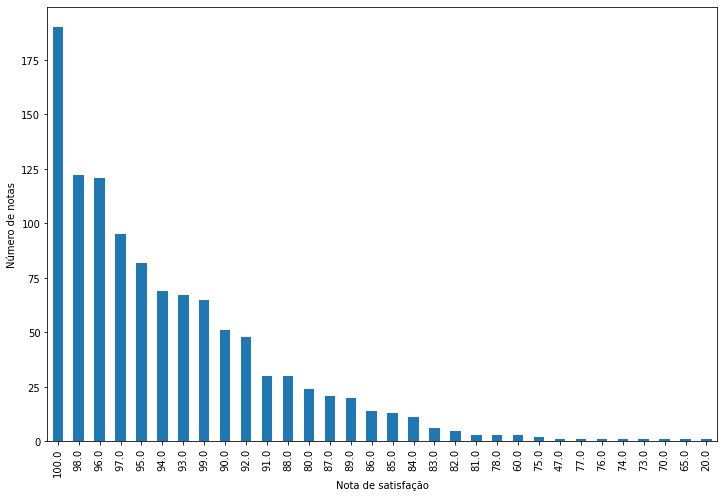

In [ ]:
df.groupby(['satisfacao_geral_hospede']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Nota de satisfação',ylabel='Número de notas')

In [ ]:
df.dtypes

<AxesSubplot:xlabel='Tipo de quarto', ylabel='Número de quartos'>

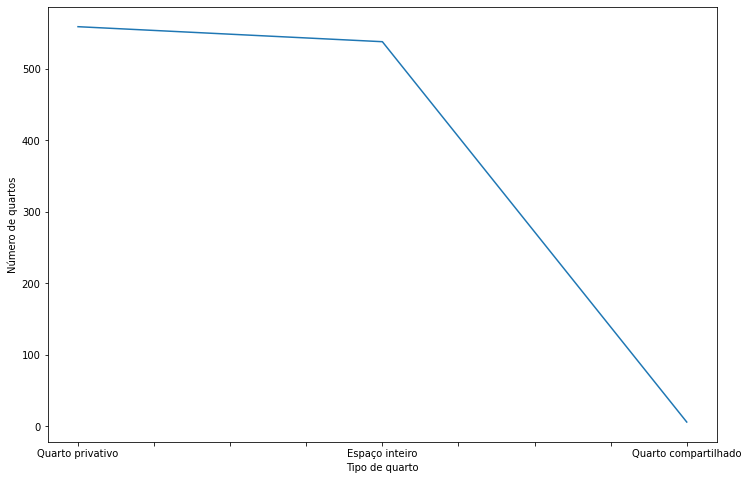

In [ ]:
df.groupby(['tipo_de_quarto']).size().sort_values(ascending=False).plot.line(figsize=(12,8), xlabel='Tipo de quarto', ylabel='Número de quartos')


<AxesSubplot:ylabel='SUPERHOST'>

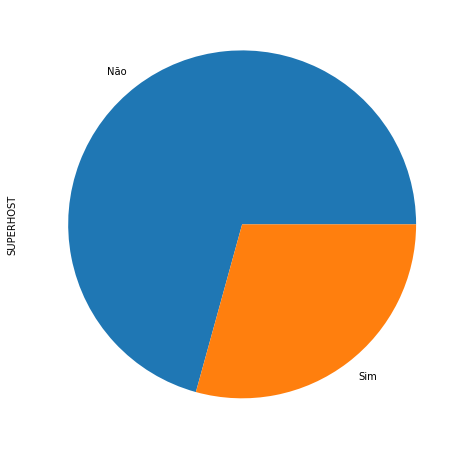

In [ ]:
df.groupby(['anfitriao_e_superhost']).size().sort_values(ascending=False).plot.pie(figsize=(12,8), ylabel='SUPERHOST')



<AxesSubplot:ylabel='Máximo de pessoas por quarto'>

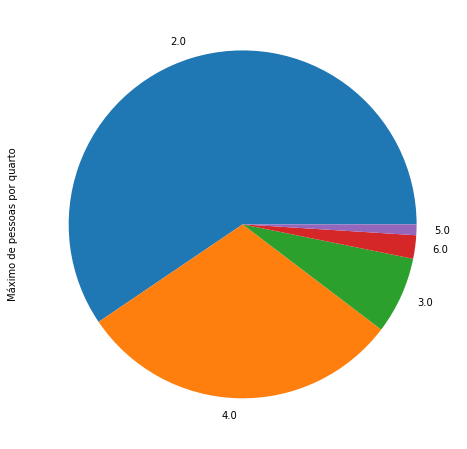

In [ ]:
df.groupby(['maximo_pessoas']).size().sort_values(ascending=False).plot.pie(figsize=(12,8), ylabel='Máximo de pessoas por quarto')

In [ ]:
df.to_csv('amsterdam_tratado.csv', index=False)

In [ ]:
df.to_excel('amsterdam_ex_tratado.xlsx', index=False)

In [ ]:
db = client['tratados']
collectionairbnb = db['airbnb_tratados']
collectionairbnb.count_documents({})

0

In [ ]:
df_dict = df.to_dict("records")

collectionairbnb.insert_many(df_dict)